In [1]:
import seaborn as sns
import pandas as pd

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB



# scatter

상관관계 시각화, 분포, 결향성, 이상치 탐색
- 회귀분석, 군집분석 등에서 EDA에 활용

<Axes: xlabel='total_bill', ylabel='tip'>

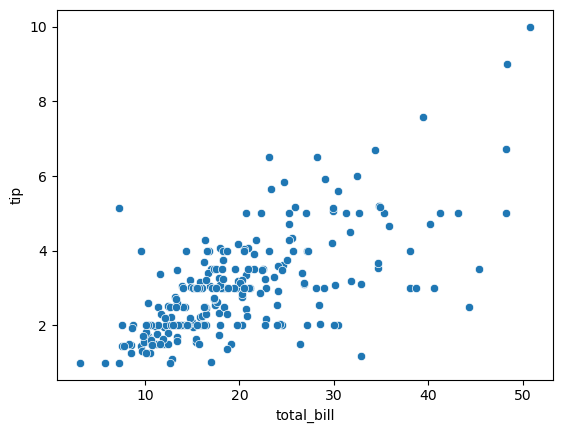

In [5]:
sns.scatterplot(x=df['total_bill'], y=df['tip'])

<Axes: xlabel='total_bill', ylabel='tip'>

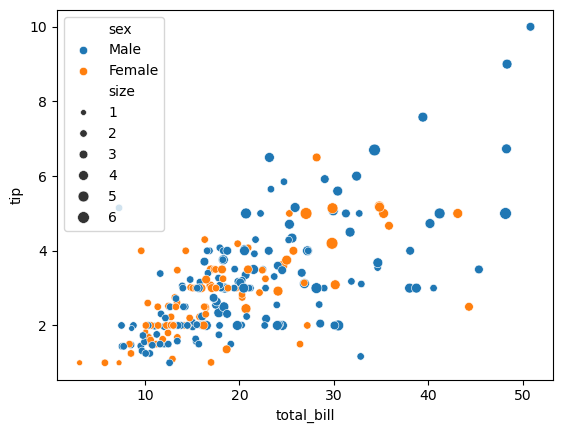

In [6]:
sns.scatterplot(x=df['total_bill'], y=df['tip'], hue=df['sex'], size=df['size'])

In [7]:
df = pd.read_csv('data/global_internet_users.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              8867 non-null   int64  
 1   Entity                  8867 non-null   object 
 2   Code                    8867 non-null   object 
 3   Year                    8867 non-null   int64  
 4   Cellular Subscription   8867 non-null   float64
 5   Internet Users(%)       8867 non-null   float64
 6   No. of Internet Users   8867 non-null   int64  
 7   Broadband Subscription  8867 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 554.3+ KB


<Axes: xlabel='Year', ylabel='No. of Internet Users'>

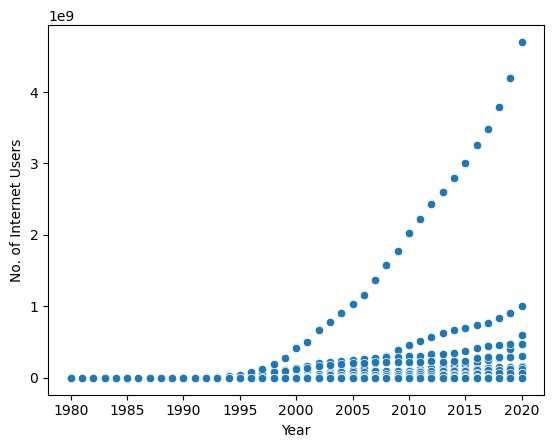

In [8]:
sns.scatterplot(x='Year', y='No. of Internet Users', data=df)

In [9]:
df.Entity.unique()  # 국가 정보

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia and Pacific', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe and Central Asia',
    

연도별 사용자 - 국가/지역 별로 구분해서 시각화

In [10]:
entities = ['China', 'India', 'Finland', 'South Korea']
df_country = df.loc[df['Entity'].isin(entities)]
df_country[:5]

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
1579,1579,China,CHN,1980,0.0,0.0,0,0.0
1580,1580,China,CHN,1981,0.0,0.0,0,0.0
1581,1581,China,CHN,1982,0.0,0.0,0,0.0
1582,1582,China,CHN,1983,0.0,0.0,0,0.0
1583,1583,China,CHN,1984,0.0,0.0,0,0.0


<Axes: xlabel='Year', ylabel='No. of Internet Users'>

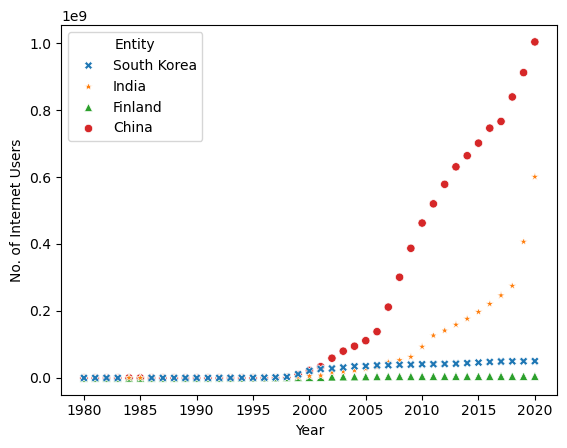

In [11]:
sns.scatterplot(x='Year', y='No. of Internet Users', data=df_country, 
                hue='Entity', hue_order=['South Korea', 'India', 'Finland', 'China'], 
                markers=['o', '^', '*', 'X'], style='Entity')

# plotly

In [12]:
import plotly.express as px

In [20]:
fig = px.scatter(data_frame=df, x='Year', y='No. of Internet Users', width=400, height=400)
fig.show()

In [23]:
color = px.colors.qualitative.Light24
px.scatter(data_frame=df_country, x='Year', y='No. of Internet Users',
           width=400, height=400, color='Entity', color_discrete_sequence=color,
           symbol='Entity', size='No. of Internet Users')

산점도는 데이터의 양에 따라 효과가 달라짐   
size 는 그룹간 차이의 식별이 어려워질 수 있음   
-> 최대 2개 정도만 구분 : hue, style

# regplot



In [24]:
tip_df = sns.load_dataset('tips')

회귀선 + 산점도 => regplot

오차구간을 함께 볼 수 있음 (CI 속성)

<Axes: xlabel='total_bill', ylabel='tip'>

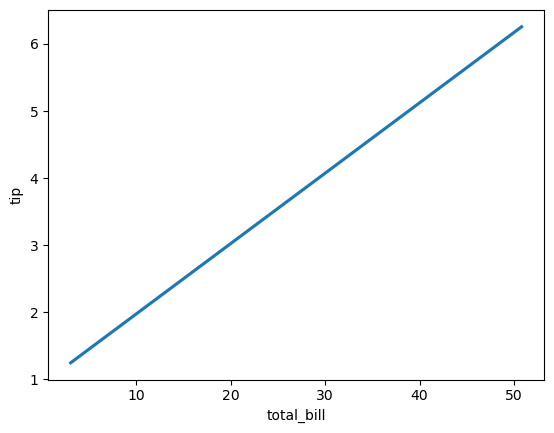

In [27]:
sns.regplot(x=tip_df['total_bill'], y=tip_df['tip'], scatter=False, ci=None)

<Axes: xlabel='size', ylabel='tip'>

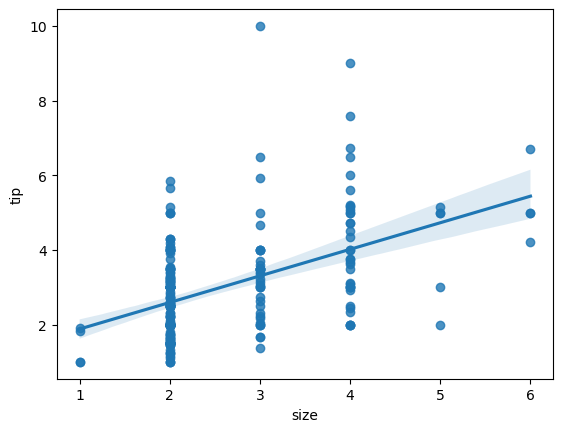

In [28]:
# size, tip으로 regplot 그리기
sns.regplot(x=tip_df['size'], y=tip_df['tip'])

In [30]:
# plotly에서 regplot
px.scatter(data_frame=tip_df, x='total_bill', y='tip',
           width=400, height=400, trendline='ols',
           color='smoker')

# Lineplot

(x, y) 점들을 이어주는 형식으로 데이터의 추세를 확인하는 용도

<Axes: xlabel='size', ylabel='tip'>

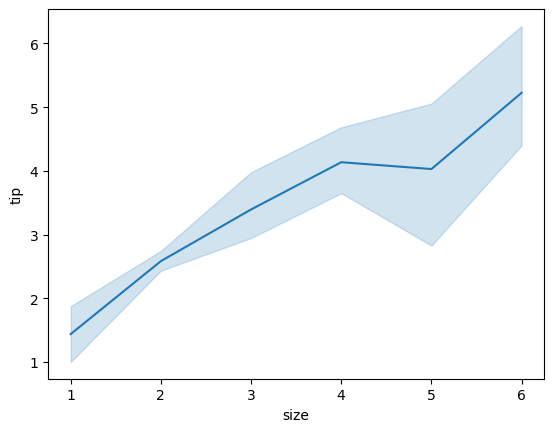

In [31]:
sns.lineplot(x='size', y='tip', data=tip_df)

<Axes: xlabel='Year', ylabel='No. of Internet Users'>

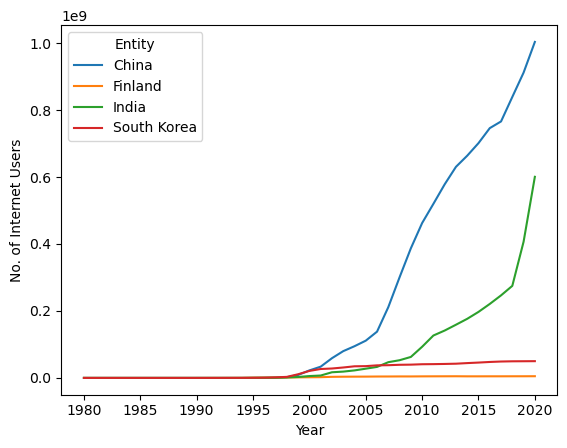

In [32]:
sns.lineplot(x='Year', y='No. of Internet Users', data=df_country, hue='Entity')

<Axes: xlabel='Year', ylabel='No. of Internet Users'>

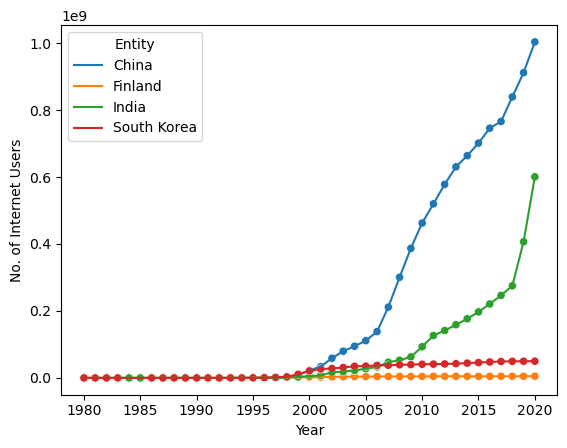

In [36]:
# scatter + line > 추세 + 데이터의 양을 함께 확인 가능
sns.lineplot(x='Year', y='No. of Internet Users', data=df_country, hue='Entity')
sns.scatterplot(x='Year', y='No. of Internet Users', data=df_country, hue='Entity', legend=False)

In [39]:
px.line(data_frame=df_country, x='Year', y='No. of Internet Users',
        width=400, height=400, line_dash='Entity', color='Entity', symbol='Entity')

# boxplot
이상치 탐지, 통계량 확인, 분포 확인

In [40]:
ev_df = pd.read_csv('data/EV_charge.csv')
ev_df.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


In [41]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sessionId       3395 non-null   int64  
 1   kwhTotal        3395 non-null   float64
 2   dollars         3395 non-null   float64
 3   created         3395 non-null   object 
 4   ended           3395 non-null   object 
 5   startTime       3395 non-null   int64  
 6   endTime         3395 non-null   int64  
 7   chargeTimeHrs   3395 non-null   float64
 8   weekday         3395 non-null   object 
 9   platform        3395 non-null   object 
 10  distance        2330 non-null   float64
 11  userId          3395 non-null   int64  
 12  stationId       3395 non-null   int64  
 13  locationId      3395 non-null   int64  
 14  managerVehicle  3395 non-null   int64  
 15  facilityType    3395 non-null   int64  
 16  Mon             3395 non-null   int64  
 17  Tues            3395 non-null   i

<Axes: xlabel='weekday', ylabel='kwhTotal'>

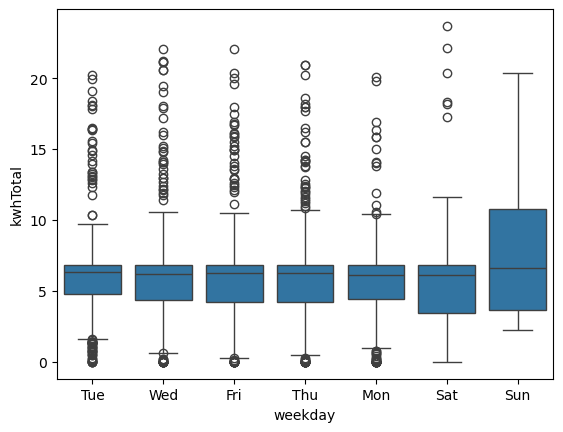

In [42]:
sns.boxplot(x='weekday', y='kwhTotal', data=ev_df)

원본 데이터 + 통계량을 같이 표현 > boxplot + stripplot

<Axes: xlabel='weekday', ylabel='kwhTotal'>

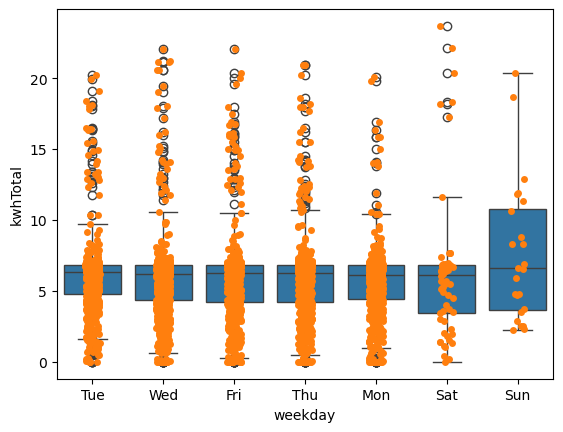

In [44]:
sns.boxplot(x='weekday', y='kwhTotal', data=ev_df)
sns.stripplot(x='weekday', y='kwhTotal', data=ev_df)

In [46]:
# boxplot 이 만능이 아님...
# swarmplot: 값이 겹치지 않아 분포를 잘 보여준다! -> 성능 저하 고려 (시간 오래)

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

74.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

73.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

78.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

76.1% of the points cannot be placed; you may 

<Axes: xlabel='weekday', ylabel='kwhTotal'>

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

73.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

72.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

75.3% of the points cannot be placed; you may 

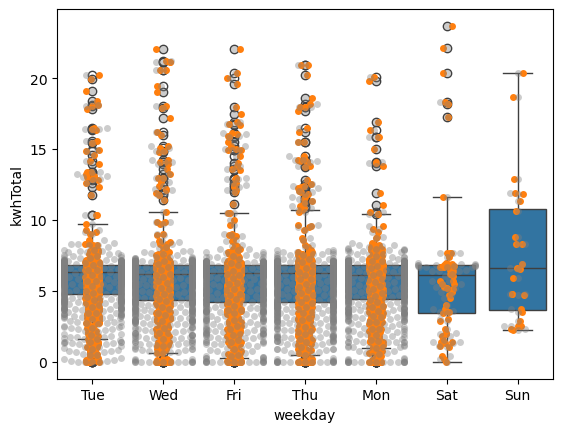

In [48]:
sns.boxplot(x='weekday', y='kwhTotal', data=ev_df)
sns.stripplot(x='weekday', y='kwhTotal', data=ev_df)
sns.swarmplot(x='weekday', y='kwhTotal', data=ev_df, color='grey', alpha=0.4)

<Axes: xlabel='weekday', ylabel='kwhTotal'>

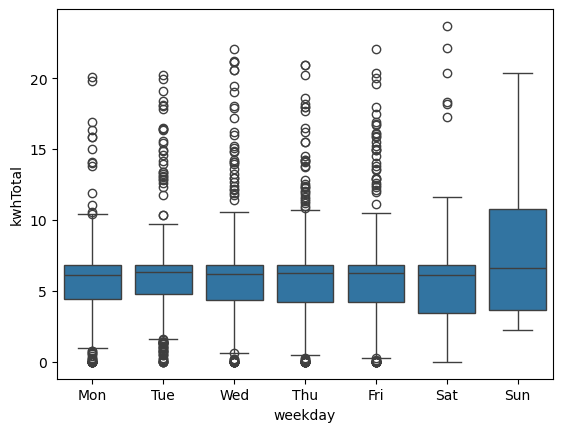

In [49]:
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.boxplot(x='weekday', y='kwhTotal', data=ev_df, order=weekday_order)

<Axes: xlabel='weekday', ylabel='kwhTotal'>

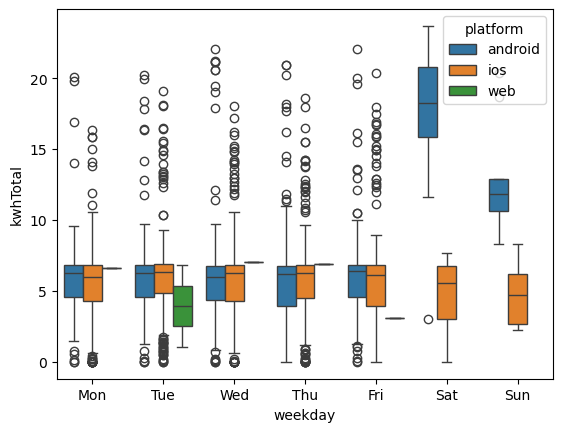

In [50]:
sns.boxplot(x='weekday', y='kwhTotal', data=ev_df, hue='platform', order=weekday_order)

In [57]:
# plotly boxplot
px.box(data_frame=ev_df, x='weekday', y='kwhTotal', width=500, height=500,
       points='all', category_orders={'weekday':weekday_order},  # dict로 줘야함
       color='platform')


# 바이올린플롯
박스플롯 + 전체 분포 모양 density 확인

중앙값 + 어디에 많이 몰려 있나, 피크가 어디인가?

<Axes: xlabel='size', ylabel='tip'>

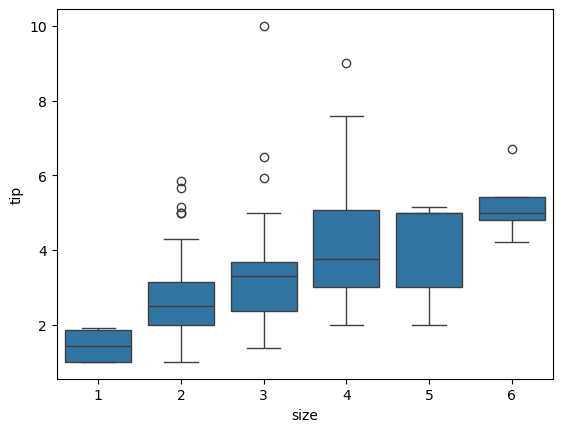

In [58]:
sns.boxplot(x='size', y='tip', data=tip_df)

<Axes: xlabel='size', ylabel='tip'>

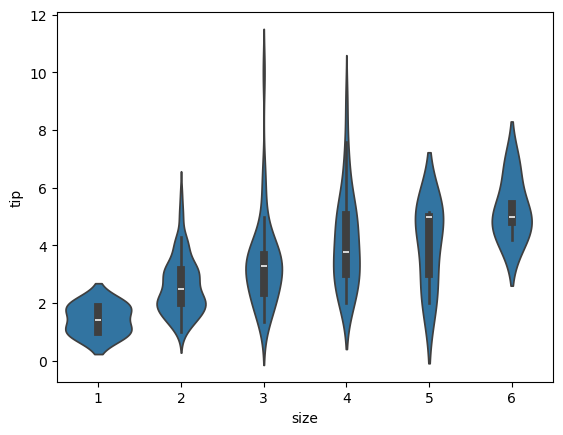

In [59]:
sns.violinplot(x='size', y='tip', data=tip_df)

# barplot

직선으로 오차구간: 에러바 -> 클수록 변동성이 크다   
막대의 크기 차이가 크지 않다 => 거의 비슷하다, 평균의 차이가 유의미하지 않다.   
추가분석 필요 - 단일변수로 설명력이 부족, 총액, 시간대, 성별 등

<Axes: xlabel='size', ylabel='tip'>

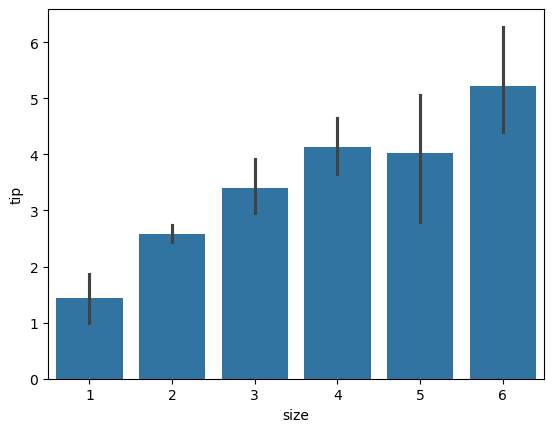

In [60]:
sns.barplot(x='size', y='tip', data=tip_df)

In [82]:
px.bar(data_frame=tip_df, x='size', y='total_bill', color='time')

# hist

# countplot

범주형 변수의 빈도수를 표현하는 차트

<Axes: xlabel='day', ylabel='count'>

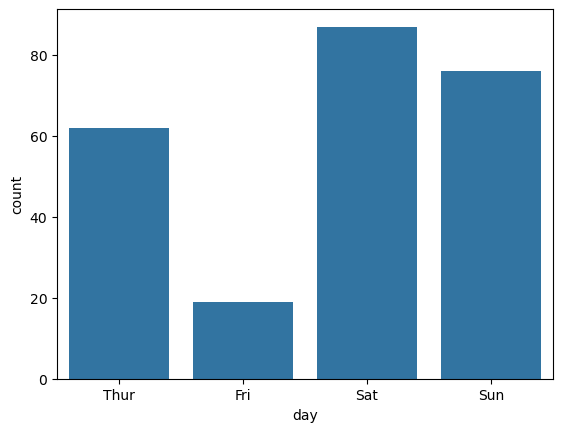

In [61]:
sns.countplot(x=tip_df['day'])

# pointplot

에러바가 추가된 line 차트

<Axes: xlabel='day', ylabel='tip'>

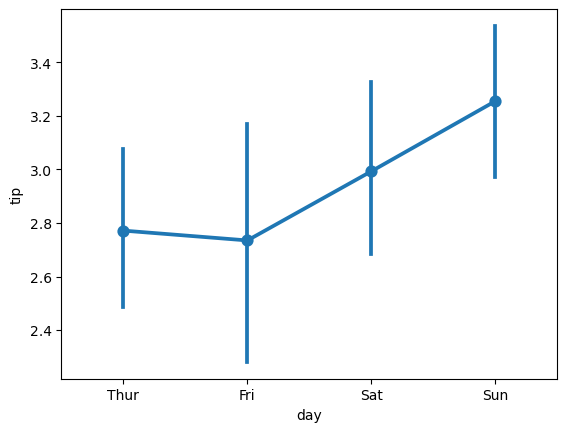

In [62]:
sns.pointplot(x='day', y='tip', data=tip_df)

# histplot
수치형 변수들의 분포 - bin 단위로 나누어서 표현해주는 차트

<Axes: xlabel='total_bill', ylabel='Count'>

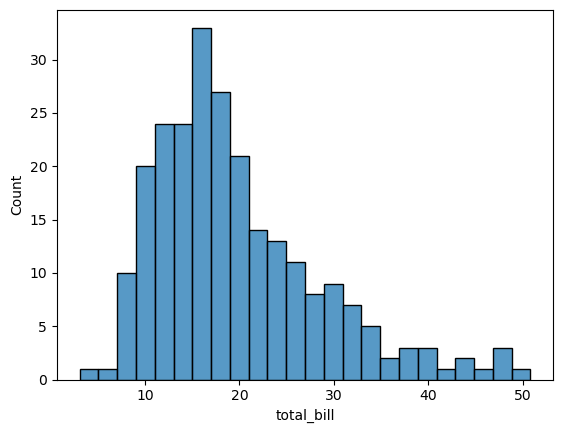

In [67]:
sns.histplot(x='total_bill', data=tip_df, bins=30, binwidth=2)

<Axes: xlabel='total_bill', ylabel='Count'>

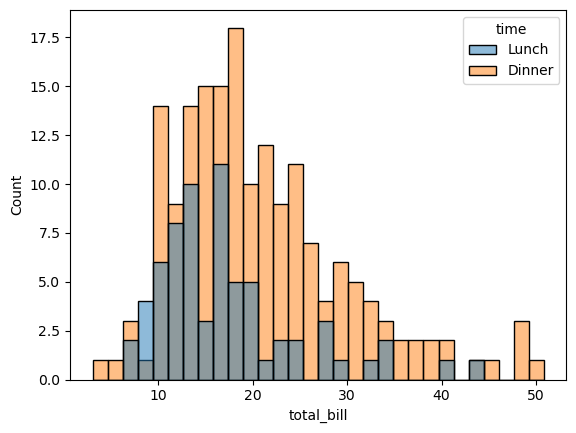

In [71]:
# 다른 변수의 그룹별로 막대 나누기
sns.histplot(x='total_bill', data=tip_df, bins=30, hue='time')

<Axes: xlabel='total_bill', ylabel='Count'>

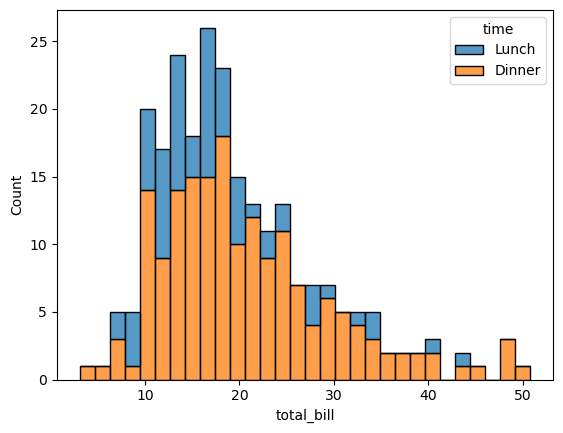

In [72]:
sns.histplot(x='total_bill', data=tip_df, bins=30, hue='time', multiple='stack')

In [74]:
# plotly histogram
px.histogram(data_frame=tip_df, x='total_bill', width=500, nbins=20)

In [78]:
px.histogram(data_frame=tip_df, x='total_bill', width=500, color='time', barmode='overlay')

# heatmap

데이터를 요약(합계, 평균, ...)한 결과를 색으로 시각화   
요약 - 피봇 테이블 (탐색) - 인사이트 시각화 히트맵

C:\Users\Admin\AppData\Local\Temp\ipykernel_10428\3103448240.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



<Axes: xlabel='size', ylabel='day'>

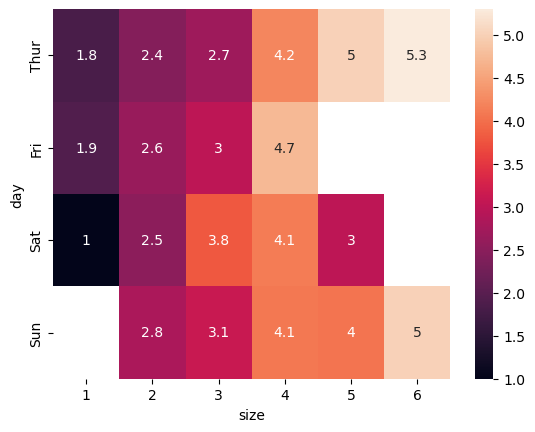

In [85]:
# 요약
pivot_df = tip_df.pivot_table('tip', 'day', 'size')

# 시각화
sns.heatmap(pivot_df, annot=True)

<Axes: xlabel='size', ylabel='day'>

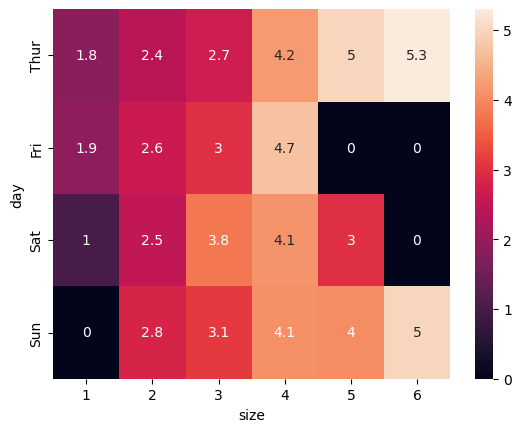

In [87]:
pivot_df.fillna(0, inplace=True)
sns.heatmap(pivot_df, annot=True)

In [89]:
# plotly.imshow()
px.imshow(pivot_df, x=pivot_df.columns, y=pivot_df.index.astype('str'), 
          width=400, height=400, text_auto='.2e')

# facetgrid
데이터를 범주형 변수에 따라 나눠서 각각 시각화

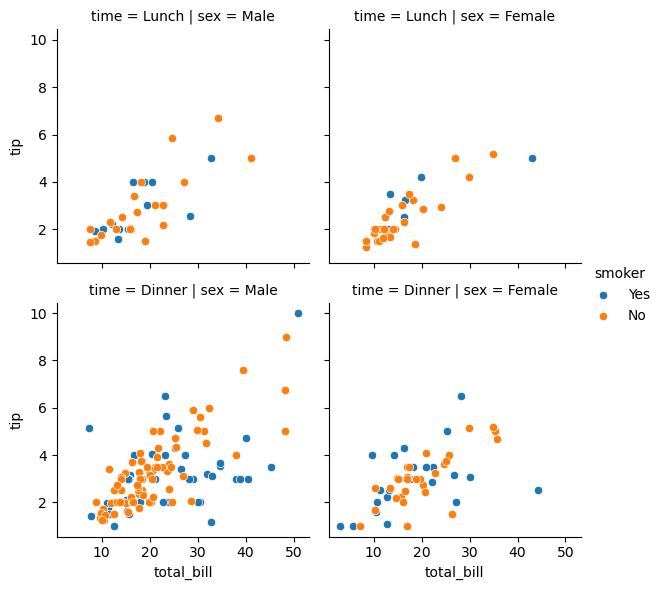

In [94]:
g = sns.FacetGrid(tip_df, col='sex', row='time', hue='smoker')
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()

# parallel_coordinates
평행좌표 플롯

In [95]:
iris_df = px.data.iris()
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [97]:
px.parallel_coordinates(iris_df, color='species_id', color_continuous_scale=px.colors.diverging.Tealrose,
                        color_continuous_midpoint=2)

In [98]:
tip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [101]:
px.parallel_coordinates(
    tip_df,
    color='size',
    color_continuous_scale=px.colors.diverging.Tealrose
)